<a href="https://colab.research.google.com/github/B-Sujith-Kumar/Predictive-Models-for-Residential-Property-Price-Forecasting-And-Analysis/blob/main/Predictive_models_for_residential_property_price_forecasting%C2%A0and%C2%A0analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup

import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve

from sklearn.metrics import auc, precision_recall_curve, f1_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge

from xgboost import XGBRegressor

## **Web Scraping from Makaan Website**

In [ ]:
n_pages=0
title=[]
location=[]
price=[]
area_size=[]
price_sqft=[]
status=[]
seller=[]
cities = ['hyderabad', 'chennai', 'mumbai', 'bangalore', 'delhi']
for city in cities:
  n_pages=0
  for i in range(0, 80):
    n_pages += 1
    url = 'https://www.makaan.com/' + city + '-residential-property/buy-property-in-' + city + '-city?page='+str(n_pages)

    r = requests.get(url)

    data=BeautifulSoup(r.text,'lxml')
    text=data.find_all('a',class_='typelink')
    loc=data.find_all("span",class_="cityName")
    cost=data.find_all("td",class_="price")
    area_sqft=data.find_all('td',class_="size")


    for h in text:
      title.append(h.text)

    for l in loc:
            d=l.text
            location.append(d)

    for i in cost:
            d=i.text
            if 'L' in d:
                a = d.split()[0]
                price.append(float(a))
            elif 'Cr' in d:
                b = d.split()[0]
                price.append(float(b) * 100)
            else:
                e=0
                price.append(float(e))

    for i in area_sqft:
            d=i.text
            area_size.append(d)
    rate_sqft=data.find_all('td',class_="lbl rate")

    for i in rate_sqft:
            d=i.text
            res= d.split('/',)[0]
            r=res.replace(',','')
            price_sqft.append(r)

    status_=data.find_all("td",class_="val")
    for i in status_:
            d=i.text
            status.append(d)
    seller_ =  data.find_all('span',class_="seller-type")
    for i in seller_:
        d=i.span.text
        seller.append(d)

      #seller.append(d)



print(title)
print(location)
print(price)
print(area_size)
print(price_sqft)
print(status)
print(seller)

['3 BHK Apartment', '2 BHK Apartment', '4 BHK Villa', '3 BHK Apartment', '2 BHK Apartment', '3 BHK Apartment', '2 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '4 BHK Villa', '3 BHK Apartment', '4 BHK Villa', '4 BHK Villa', '4 BHK Apartment', 'Residential Plot', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '4 BHK Independent House', '4 BHK Villa', '4 BHK Villa', '2 BHK Apartment', 'Residential Plot', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '4 BHK Villa', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '2 BHK Apartment', '3 BHK Apartment', '3 BHK Apartment', '2 BHK Apartment', '4 BHK Villa', '3 BHK Apartment', '4 BHK Villa', '4 BHK Villa', '3 BHK Apartment', 'Residential Plot', '3 BHK Apartment', '2 BHK Apartment', '3 BHK Apartment', '1 BHK Apartment', '4 BHK Independent House', '4 BHK Villa', '2 BHK Apartment', 'Residential Plot', '3 BHK Apartment', '2 BHK Apartment

In [ ]:
df = pd.DataFrame()
df['title'] = title
df['location'] = location
df['price'] = price
df['area_size'] = area_size
df['price_sqft'] = price_sqft
df['status'] = status
df['seller'] = seller

In [ ]:
df

,title,location,price,area_size,price_sqft,status,seller
0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
4,2 BHK Apartment,Hyderabad,64.95,1065,6104,Under Construction,BUILDER
...,...,...,...,...,...,...,...
7995,2 BHK Apartment,Delhi,23.00,560,4107,Ready to move,AGENT
7996,3 BHK Apartment,Delhi,145.00,1700,8529,Ready to move,AGENT
7997,2 BHK Apartment,Delhi,19.75,560,3526,Ready to move,AGENT
7998,3 BHK Apartment,Delhi,35.00,800,4375,Ready to move,AGENT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       8000 non-null   object 
 1   location    8000 non-null   object 
 2   price       8000 non-null   float64
 3   area_size   8000 non-null   object 
 4   price_sqft  8000 non-null   object 
 5   status      8000 non-null   object 
 6   seller      8000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 437.6+ KB


In [ ]:
d3 = df[(df['price']==0)]

df.drop_duplicates(inplace=True)
df=df.reset_index()

d3

,title,location,price,area_size,price_sqft,status,seller


In [ ]:
df

,index,title,location,price,area_size,price_sqft,status,seller
0,0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
4,4,2 BHK Apartment,Hyderabad,64.95,1065,6104,Under Construction,BUILDER
...,...,...,...,...,...,...,...,...
5912,7994,3 BHK Apartment,Delhi,50.00,950,5263,Ready to move,AGENT
5913,7995,2 BHK Apartment,Delhi,23.00,560,4107,Ready to move,AGENT
5914,7997,2 BHK Apartment,Delhi,19.75,560,3526,Ready to move,AGENT
5915,7998,3 BHK Apartment,Delhi,35.00,800,4375,Ready to move,AGENT


In [ ]:
d = df.to_csv('house_cities.csv')

In [ ]:
# house_data = pd.read_csv("house_cities.csv")

house_data = pd.read_csv("/content/drive/MyDrive/house_cities.csv")

In [ ]:
house_data

,Unnamed: 0,index,title,location,price,area_size,price_sqft,status,seller
0,0,0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,1,1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,2,2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3,3,3 BHK Apartment,Hyderabad,113.00,1800,6300,Under Construction,BUILDER
4,4,4,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
...,...,...,...,...,...,...,...,...,...
5936,5936,7994,3 BHK Independent Floor,Delhi,46.00,900,5111,Ready to move,AGENT
5937,5937,7995,2 BHK Apartment,Delhi,20.00,450,4444,Ready to move,AGENT
5938,5938,7996,2 BHK Apartment,Delhi,33.00,720,4583,Ready to move,AGENT
5939,5939,7997,3 BHK Independent Floor,Delhi,48.60,900,5400,Ready to move,AGENT


In [ ]:
house_data.drop("Unnamed: 0", axis = 1, inplace = True)

house_data.drop("index", axis = 1, inplace = True)

# house_data.drop("level_0", axis = 1, inplace = True)

house_data

,title,location,price,area_size,price_sqft,status,seller
0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3 BHK Apartment,Hyderabad,113.00,1800,6300,Under Construction,BUILDER
4,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
...,...,...,...,...,...,...,...
5936,3 BHK Independent Floor,Delhi,46.00,900,5111,Ready to move,AGENT
5937,2 BHK Apartment,Delhi,20.00,450,4444,Ready to move,AGENT
5938,2 BHK Apartment,Delhi,33.00,720,4583,Ready to move,AGENT
5939,3 BHK Independent Floor,Delhi,48.60,900,5400,Ready to move,AGENT


# **PERFORMING EXPLORATORY DATA ANALYSIS ON THE DATASET**

In [ ]:
status_counts = house_data['status'].value_counts()

fig = px.pie(status_counts, names=status_counts.index, values=status_counts.values, title='Status Distribution', width = 800)

fig.show()

The above pie chart shows the percentage distribution of Building status in the House market with majority buildings under construction

In [ ]:
df2 = house_data["title"].value_counts()
fig = px.bar(df2, x = "title", color = "title", height = 600, width = 1000)
fig.show()

The above bar graph shows the number of houses available for each house type

In [ ]:
apartment_entries = house_data[house_data['title'].str.contains('Apartment')]

value_counts = apartment_entries['title'].value_counts()

value_counts

2 BHK Apartment          1676
3 BHK Apartment          1569
1 BHK Apartment           535
4 BHK Apartment           305
5 BHK Apartment            48
1 RK Studio Apartment      32
2 RK Studio Apartment       2
10 BHK Apartment            2
Name: title, dtype: int64

In [ ]:
fig = px.bar(value_counts, x = value_counts.keys(), y = value_counts.values, color = value_counts.keys(), height = 600, width = 1000)
fig.show()

The above bar graph represents the the number of available apartments in the Market

In [ ]:
villa_entries = house_data[house_data['title'].str.contains('Villa')]

value_counts2 = villa_entries['title'].value_counts()

value_counts2

4 BHK Villa     124
3 BHK Villa      98
2 BHK Villa      28
5 BHK Villa      16
1 BHK Villa       5
6 BHK Villa       4
10 BHK Villa      2
7 BHK Villa       2
8 BHK Villa       1
Name: title, dtype: int64

In [ ]:
fig = px.bar(value_counts, x = value_counts2.keys(), y = value_counts2.values, color = value_counts2.keys(), height = 600, width = 1000)
fig.show()

The above bar graph represents the the number of available villas in the Market

In [ ]:
apartment_entries_price = house_data[house_data['title'].str.contains('Apartment')]

mean_prices = apartment_entries_price.groupby('title')['price'].mean()

mean_prices

title
1 BHK Apartment           52.708710
1 RK Studio Apartment     50.647500
10 BHK Apartment         550.000000
2 BHK Apartment           80.787780
2 RK Studio Apartment     69.000000
3 BHK Apartment          136.359152
4 BHK Apartment          280.206098
5 BHK Apartment          541.770833
Name: price, dtype: float64

In [ ]:
fig = px.bar(mean_prices, x = mean_prices.keys(), y = mean_prices.values, color = mean_prices.keys(), height = 600, width = 1000)
fig.update_xaxes(title_text='Apartment type')
fig.update_yaxes(title_text='Average price (in Lakhs)')
fig.show()

The above bar graph represents the average price of each Apartment Type

In [ ]:
fig = px.histogram(house_data, x='price', title='Price Distribution (Histogram)', nbins = 500)

fig.show()

The above histogram displays the distribution of House Prices with each bin representing price range

In [ ]:

loc_counts = house_data['location'].value_counts()['Delhi':'Mumbai']

loc_counts

Delhi        1208
Bangalore    1194
Chennai      1181
Mumbai       1103
Name: location, dtype: int64

In [ ]:
fig = px.bar(loc_counts, x = loc_counts.keys(), y = loc_counts.values, color = loc_counts.keys(), height = 600, width = 1000)

fig.update_xaxes(title_text='location')
fig.update_yaxes(title_text='Count of properties')

fig.show()

The above bar graph shows the count of available properties in each loaction

In [ ]:
location_stats = house_data.groupby('location').agg({'title': 'count', 'price': 'mean'}).reset_index()
location_stats.columns = ['Location', 'Property Count', 'Mean Price']

location_stats = location_stats.sort_values(by='Property Count', ascending=False)

top_10_locations = location_stats.head(5)

fig = px.bar(top_10_locations, x='Location', y='Mean Price', color='Location',
             title='Locations by Property Count and Mean Price')
fig.show()

The above bar graph shows the average price of properties based on their location

In [ ]:
house_data['seller'].value_counts()

AGENT             2527
VERIFIED OWNER    1749
BUILDER           1665
Name: seller, dtype: int64

In [ ]:
seller_counts = house_data['seller'].value_counts()

fig = px.pie(seller_counts, names=seller_counts.index, values=seller_counts.values, title='Seller Type Distribution', width = 800)

fig.show()

The above pie chart represents the percentage distribution of types of seller in the market

In [ ]:
mean_price_by_area = house_data.groupby('area_size')['price'].mean().reset_index()

mean_price_by_area.columns = ['area_size', 'mean_price']

fig = px.line(mean_price_by_area, x='area_size', y='mean_price', title='Mean Price vs. Area Size')

fig.show()

The line graph shows mean price based on the size of the property

<Axes: >

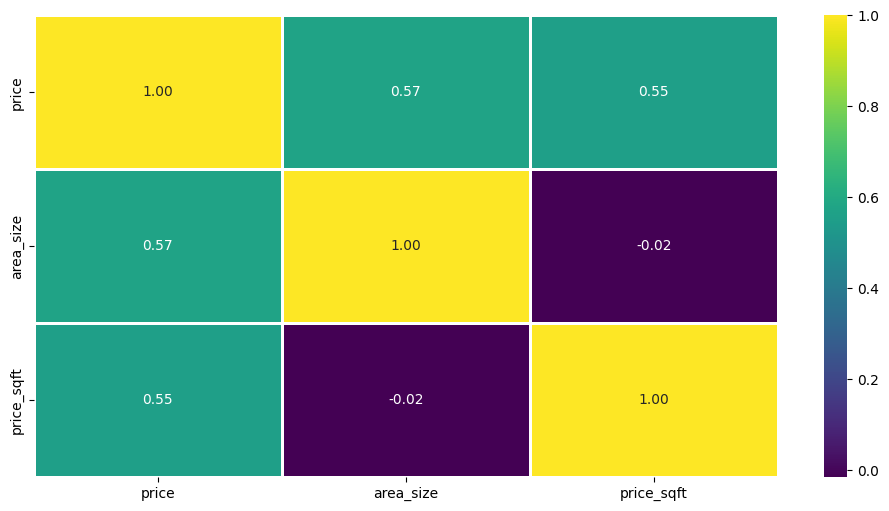

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(house_data.corr(numeric_only=True),
            cmap = 'viridis',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

The above Heatmap displays the cross correlation between area,price and price per sqft

In [ ]:
house_data = house_data[house_data['title'] != '1 RK Studio Apartment']

house_data.reset_index(drop=True, inplace=True)

house_data

,title,location,price,area_size,price_sqft,status,seller
0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3 BHK Apartment,Hyderabad,113.00,1800,6300,Under Construction,BUILDER
4,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
...,...,...,...,...,...,...,...
5904,3 BHK Independent Floor,Delhi,46.00,900,5111,Ready to move,AGENT
5905,2 BHK Apartment,Delhi,20.00,450,4444,Ready to move,AGENT
5906,2 BHK Apartment,Delhi,33.00,720,4583,Ready to move,AGENT
5907,3 BHK Independent Floor,Delhi,48.60,900,5400,Ready to move,AGENT


In [ ]:
house_data = house_data[house_data['title'] != '2 RK Studio Apartment']

house_data.reset_index(drop=True, inplace=True)

house_data

,title,location,price,area_size,price_sqft,status,seller
0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER
1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER
2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER
3,3 BHK Apartment,Hyderabad,113.00,1800,6300,Under Construction,BUILDER
4,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER
...,...,...,...,...,...,...,...
5902,3 BHK Independent Floor,Delhi,46.00,900,5111,Ready to move,AGENT
5903,2 BHK Apartment,Delhi,20.00,450,4444,Ready to move,AGENT
5904,2 BHK Apartment,Delhi,33.00,720,4583,Ready to move,AGENT
5905,3 BHK Independent Floor,Delhi,48.60,900,5400,Ready to move,AGENT


In [ ]:
house_data[['BHK', 'Type']] = house_data['title'].str.split(' ', 1, expand=True)

house_data['Type'] = house_data['Type'].str.replace('BHK', '')

house_data['Type'] = house_data['Type'].str.strip()

# house_data.drop(columns=['title'], inplace=True)

house_data['BHK'] = np.where(house_data['title'] == 'Residential Plot', '0', house_data['BHK'])

house_data


,title,location,price,area_size,price_sqft,status,seller,BHK,Type
0,3 BHK Apartment,Hyderabad,65.98,1571,4200,Under Construction,BUILDER,3,Apartment
1,2 BHK Apartment,Hyderabad,62.91,1165,5400,Under Construction,BUILDER,2,Apartment
2,4 BHK Villa,Hyderabad,148.00,1930,7700,Under Construction,BUILDER,4,Villa
3,3 BHK Apartment,Hyderabad,113.00,1800,6300,Under Construction,BUILDER,3,Apartment
4,3 BHK Apartment,Hyderabad,127.00,1967,6500,Under Construction,BUILDER,3,Apartment
...,...,...,...,...,...,...,...,...,...
5902,3 BHK Independent Floor,Delhi,46.00,900,5111,Ready to move,AGENT,3,Independent Floor
5903,2 BHK Apartment,Delhi,20.00,450,4444,Ready to move,AGENT,2,Apartment
5904,2 BHK Apartment,Delhi,33.00,720,4583,Ready to move,AGENT,2,Apartment
5905,3 BHK Independent Floor,Delhi,48.60,900,5400,Ready to move,AGENT,3,Independent Floor


In [ ]:
house_data['Type'].value_counts()

Apartment            4135
Plot                  712
Independent Floor     555
Villa                 280
Independent House     225
Name: Type, dtype: int64

In [ ]:
house_data['Type'].unique()

array(['Apartment', 'Villa', 'Plot', 'Independent House',
       'Independent Floor'], dtype=object)

In [ ]:
house_data['BHK'] = house_data['BHK'].astype(int)

final_data = house_data.drop('title', axis = 1)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5907 non-null   object 
 1   price       5907 non-null   float64
 2   area_size   5907 non-null   int64  
 3   price_sqft  5907 non-null   int64  
 4   status      5907 non-null   object 
 5   seller      5907 non-null   object 
 6   BHK         5907 non-null   int64  
 7   Type        5907 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 369.3+ KB


In [ ]:
final_data=house_data.drop('title',axis=1)

In [ ]:
outlier_data = final_data

In [ ]:
final_data.drop('price_sqft', axis = 1,inplace=True)

In [ ]:
final_data

,location,price,area_size,status,seller,BHK,Type
0,Hyderabad,65.98,1571,Under Construction,BUILDER,3,Apartment
1,Hyderabad,62.91,1165,Under Construction,BUILDER,2,Apartment
2,Hyderabad,148.00,1930,Under Construction,BUILDER,4,Villa
3,Hyderabad,113.00,1800,Under Construction,BUILDER,3,Apartment
4,Hyderabad,127.00,1967,Under Construction,BUILDER,3,Apartment
...,...,...,...,...,...,...,...
5902,Delhi,46.00,900,Ready to move,AGENT,3,Independent Floor
5903,Delhi,20.00,450,Ready to move,AGENT,2,Apartment
5904,Delhi,33.00,720,Ready to move,AGENT,2,Apartment
5905,Delhi,48.60,900,Ready to move,AGENT,3,Independent Floor


## **Label Encoding the categorical variables**

In [ ]:
encoders = {}
for column in final_data.columns:
  if (final_data[column].dtype == 'object'):
    encoder = LabelEncoder()
    final_data[column] = encoder.fit_transform(final_data[column])
    encoders[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Encoded Data:")
print(final_data)
print("Class Mappings:")
print(encoders)



Encoded Data:
      location   price  area_size  status  seller  BHK  Type
0            3   65.98       1571       3       1    3     0
1            3   62.91       1165       3       1    2     0
2            3  148.00       1930       3       1    4     4
3            3  113.00       1800       3       1    3     0
4            3  127.00       1967       3       1    3     0
...        ...     ...        ...     ...     ...  ...   ...
5902         2   46.00        900       1       0    3     1
5903         2   20.00        450       1       0    2     0
5904         2   33.00        720       1       0    2     0
5905         2   48.60        900       1       0    3     1
5906         2   22.00        450       1       0    2     1

[5907 rows x 7 columns]
Class Mappings:
{'location': {'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Mumbai': 4}, 'status': {'New': 0, 'Ready to move': 1, 'Resale': 2, 'Under Construction': 3}, 'seller': {'AGENT': 0, 'BUILDER': 1, 'VERIFIED 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
X = final_data.drop("price",axis= 1)
y= final_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge_regressor = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge_regressor = Ridge(alpha=best_alpha)

ridge_regressor.fit(X_train, y_train)

y_pred = ridge_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Best Alpha: 10.0
Root Mean Squared Error (RMSE): 124.00238994953835
R-squared (R2) Score: 0.46394318730998907


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

## **Decision tree algorithm with Hyperparameter tuning**

In [ ]:
X = final_data.drop('price', axis = 1)
y = final_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': ['log2']
}

reg = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeRegressor(**best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

best_model.score(X_test, y_test)*100

r2 = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared (R2) Score:", r2)

Best Alpha: 10.0
Root Mean Squared Error (RMSE): 97.15275140433614
R-squared (R2) Score: 0.6709507406234663


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

## **Random Forest Algorithm**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=500)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f} ")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")

Root Mean Squared Error on Testing Data: 80.66 
R-squared (R²) Score on Testing Data: 0.77


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()


In [ ]:
print(best_params)

{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


## **XGBoost Algorithm**

In [ ]:
X = final_data.drop('price', axis = 1)
y = final_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = XGBRegressor(n_estimators=75,random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")

Root Mean Squared Error on Testing Data: 79.65
R-squared (R²) Score on Testing Data: 0.78


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

## **XGBoost Algorithm with Hyperparameter Tuning**

In [ ]:
model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [50,100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [2],
    'colsample_bytree': [0.7,0.5],
    'subsample': [ 0.8,0.9],

 }


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = XGBRegressor(random_state=42, **best_params)

best_model.fit(X_train, y_train)

selection = SelectFromModel(best_model, prefit=True)
X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")
print("Training accuracy of the model:", best_model.score(X_train, y_train))

Root Mean Squared Error on Testing Data: 87.18
R-squared (R²) Score on Testing Data: 0.74
Training accuracy of the model: 0.8513628877595503


In [ ]:
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

## **Gradient Boost Algorithm**

In [ ]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")

Root Mean Squared Error on Testing Data: 91.72
R-squared (R²) Score on Testing Data: 0.71


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

In [ ]:
final_data

,location,price,area_size,status,seller,BHK,Type
0,3,65.98,1571,3,1,3,0
1,3,62.91,1165,3,1,2,0
2,3,148.00,1930,3,1,4,4
3,3,113.00,1800,3,1,3,0
4,3,127.00,1967,3,1,3,0
...,...,...,...,...,...,...,...
5902,2,46.00,900,1,0,3,1
5903,2,20.00,450,1,0,2,0
5904,2,33.00,720,1,0,2,0
5905,2,48.60,900,1,0,3,1


## **Random Forest Algorithm with Hyperparameter Tuning**

In [ ]:


X = final_data.drop('price', axis = 1)
y = final_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()

hyperparameters = {
    "n_estimators": [10, 100, 1000],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
}

search = RandomizedSearchCV(regressor, hyperparameters, n_iter=10, cv=3)

search.fit(X_train, y_train)

y_pred = search.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f} ")

score = search.score(X_test, y_test)
print("Score:", score)
print(search.score(X_train, y_train))

Root Mean Squared Error on Testing Data: 81.66 
Score: 0.7675317123684015
0.8312324703549455


## **Grid Search on Random Forest**

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [ 300],
    "max_depth": [ 7],
    "min_samples_split": [2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = RandomForestRegressor(random_state=42, **best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")

Root Mean Squared Error on Testing Data: 89.18
R-squared (R²) Score on Testing Data: 0.72


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

## **Ridge Regularization**

In [ ]:
X=final_data.drop("price",axis=1)
y= final_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=2.0)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R-squared (R2): {r2_ridge}")

Ridge Regression Model:
Root Mean Squared Error (RMSE): 123.99318454314626
Mean Absolute Error (MAE): 64.79372188152014
R-squared (R2): 0.46402277348005416


In [ ]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_regressor = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'random_state': [42]
}

random_search = RandomizedSearchCV(xgb_regressor, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

xgb_regressor = xgb.XGBRegressor(**best_params)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Best Hyperparameters: {'subsample': 0.8, 'random_state': 42, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Root Mean Squared Error (RMSE): 80.73116003090378
R-squared (R2) Score: 0.7727870426052503


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

In [ ]:
new_dict = encoders['location']
new_list = list(new_dict.keys())
len(new_list)

5

In [ ]:
user_location = input("Enter a location: ").strip().lower().replace(" ", "")
location_encoding_modified = {key.lower().replace(" ", ""): value for key, value in new_dict.items()}
if user_location in location_encoding_modified:
    encoded_value = location_encoding_modified[user_location]
loc = encoded_value

size = int(input('Enter Size : '))
status = int(input('Enter Status : '))
seller_type = int(input("Enter seller type : "))
bhk = int(input('Enter No of Bedrooms : '))
prop_typ = int(input('Enter Type : '))
input_data = np.array([[loc, size, status, seller_type, bhk, prop_typ]])
input_data = np.array([[0,	1030,	1,	0,	2,	0]])
predict_price = search.predict(input_data)[0]

print('Predicted Price : ₹', predict_price, 'Lakhs')

Predicted Price : ₹ 65.54673673110061 Lakhs


In [ ]:
X = final_data.drop('price', axis = 1)
y = final_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 6617.0113119569005
R-squared: 0.7693185961557676


## **Removing Outliers and applying Machine Learning**

In [ ]:
outlier_data['price_sqft'] = house_data['price_sqft']

outlier_data

,location,price,area_size,status,seller,BHK,Type,price_sqft
0,3,65.98,1571,3,1,3,0,4200
1,3,62.91,1165,3,1,2,0,5400
2,3,148.00,1930,3,1,4,4,7700
3,3,113.00,1800,3,1,3,0,6300
4,3,127.00,1967,3,1,3,0,6500
...,...,...,...,...,...,...,...,...
5902,2,46.00,900,1,0,3,1,5111
5903,2,20.00,450,1,0,2,0,4444
5904,2,33.00,720,1,0,2,0,4583
5905,2,48.60,900,1,0,3,1,5400


In [ ]:
property_types = outlier_data['Type'].unique()
filtered_data = []

for prop_type in property_types:
    subset = outlier_data[outlier_data['Type'] == prop_type]

    subset['Price_Per_Sqft'] = subset['price_sqft']

    Q1 = subset['Price_Per_Sqft'].quantile(0.25)
    Q3 = subset['Price_Per_Sqft'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_subset = subset[(subset['Price_Per_Sqft'] >= lower_bound) & (subset['Price_Per_Sqft'] <= upper_bound)]
    filtered_data.append(filtered_subset)
filtered_house_data = pd.concat(filtered_data)



for prop_type in property_types:
    subset = filtered_house_data[filtered_house_data['Type'] == prop_type]

# avg_price_per_sqft = filtered_house_data.groupby('Type')['Price_Per_Sqft'].mean().reset_index()

filtered_house_data = filtered_house_data.reset_index()

filtered_house_data.drop(['price_sqft', 'index'], axis = 1, inplace = True)

filtered_house_data

,location,price,area_size,status,seller,BHK,Type,Price_Per_Sqft
0,3,65.98,1571,3,1,3,0,4200
1,3,62.91,1165,3,1,2,0,5400
2,3,113.00,1800,3,1,3,0,6300
3,3,127.00,1967,3,1,3,0,6500
4,3,64.95,1065,3,1,2,0,6104
...,...,...,...,...,...,...,...,...
5364,2,48.50,900,1,0,3,1,5388
5365,2,52.00,900,1,0,3,1,5777
5366,2,46.00,900,1,0,3,1,5111
5367,2,48.60,900,1,0,3,1,5400


### **Random Forest with Hyperparameter Tuning**

In [ ]:
X = filtered_house_data.drop(['price', 'Price_Per_Sqft'], axis = 1)
y = filtered_house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()

hyperparameters = {
    "n_estimators": [10, 100, 1000],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
}

search = RandomizedSearchCV(regressor, hyperparameters, n_iter=10, cv=3)

search.fit(X_train, y_train)

y_pred = search.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f} ")
score = search.score(X_test, y_test)
print("Score:", score)
print(search.score(X_train, y_train))

Root Mean Squared Error on Testing Data: 56.46 
Score: 0.8040825560643368
0.8601791298725326


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

In [ ]:
input_data = np.array([[1,	2381,	1,	1,	4,	0]])
predict_price = search.predict(input_data)[0]

print('Predicted Price : ₹', predict_price, 'Lakhs')

Predicted Price : ₹ 224.54457407892423 Lakhs


## **XGBoost Algorithm**

In [ ]:
X = filtered_house_data.drop(['price','Price_Per_Sqft'], axis = 1)
y = filtered_house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = XGBRegressor(n_estimators=75, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:.2f}")

Root Mean Squared Error on Testing Data: 50.38
R-squared (R²) Score on Testing Data: 0.84


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

# **Random Forest without Hyperparameter Tuning**

In [ ]:
X = filtered_house_data.drop(['price','Price_Per_Sqft'], axis = 1)
y = filtered_house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Testing Data: {rmse:} ")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Testing Data: {r2:}")

Root Mean Squared Error on Testing Data: 47.71238625341882 
R-squared (R²) Score on Testing Data: 0.8600978621769502


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

### **Random Forest with Grid Search**

In [ ]:
X = filtered_house_data.drop(['price','Price_Per_Sqft'], axis = 1)
y = filtered_house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 2376.477997372509
R-squared: 0.8539519127667535


In [ ]:
predicted = y_pred.tolist()

tested = y_test.tolist()

data = {'Actual': tested,
        'Predicted': predicted}

df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted', title='Actual vs. Predicted Y Values')

fig.add_shape(type='line',
              x0=min(df['Actual']), y0=min(df['Actual']),
              x1=max(df['Actual']), y1=max(df['Actual']),
              line=dict(color='red', dash='dash'),
              name='Perfect Prediction')

fig.show()

Decision Tree with Hyper parameter tuning

In [ ]:

X = filtered_house_data.drop(['price','Price_Per_Sqft'], axis = 1)
y = filtered_house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': ['log2']
}

reg = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeRegressor(**best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

best_model.score(X_test, y_test)*100

r2 = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared (R2) Score:", r2)

Best Alpha: 10.0
Root Mean Squared Error (RMSE): 65.03471532940749
R-squared (R2) Score: 0.7400723005963585


In [ ]:
import pickle

with open('house_model_rfht.pkl', 'wb') as f:
  pickle.dump(search, f)